In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
pip install tensorflow

In [56]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en_core_web_sm')
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
true_data=pd.read_csv('/content/drive/MyDrive/csvfiles/True.csv')
fake_data=pd.read_csv('/content/drive/MyDrive/csvfiles/Fake.csv')

In [58]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [59]:
true_data['label']=1
fake_data['label']=0
data=pd.concat([true_data,fake_data])
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


<ipython-input-60-1182761ec185>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=data,palette='Blues_r')


Text(0.5, 1.0, 'fake news vs true news')

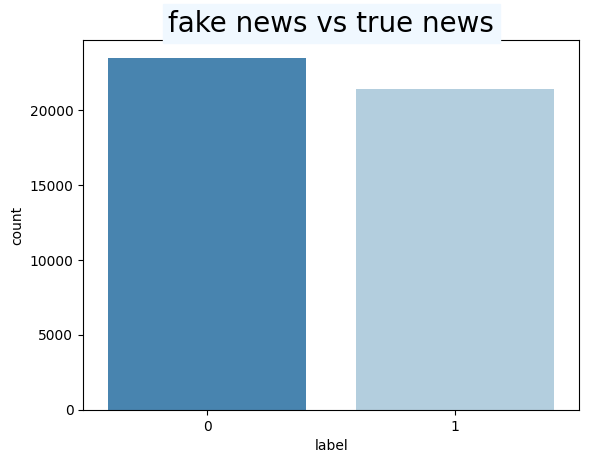

In [60]:
sns.countplot(x='label',data=data,palette='Blues_r')
plt.title('fake news vs true news',fontsize='20',backgroundcolor='aliceblue')

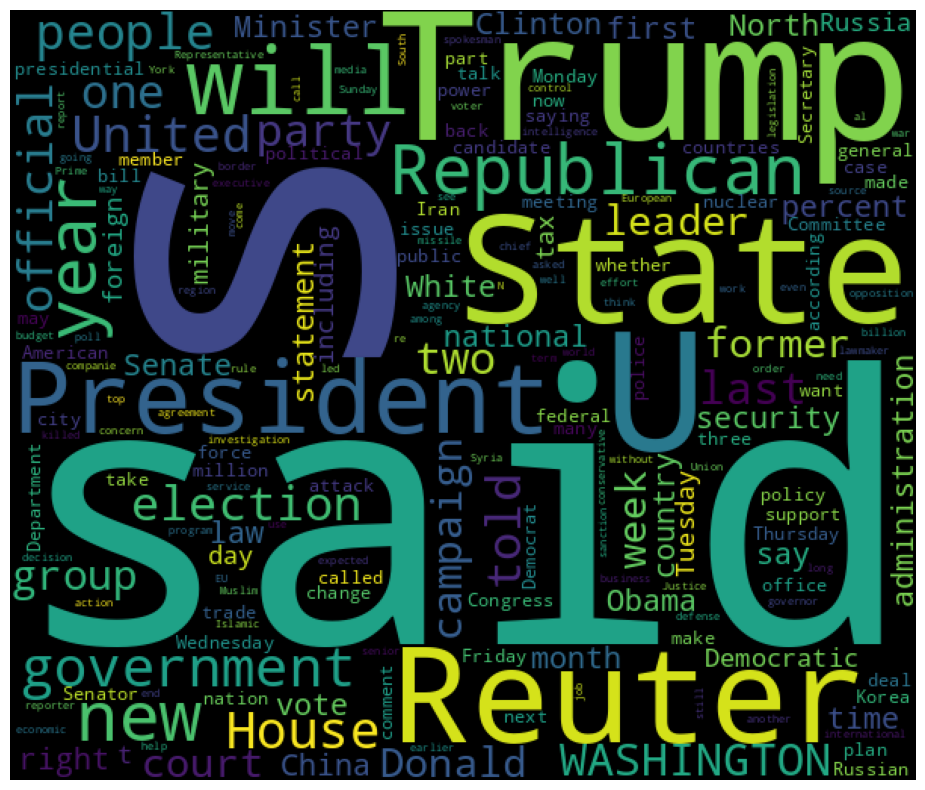

In [61]:
true_text = " ".join(i for i in true_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(true_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


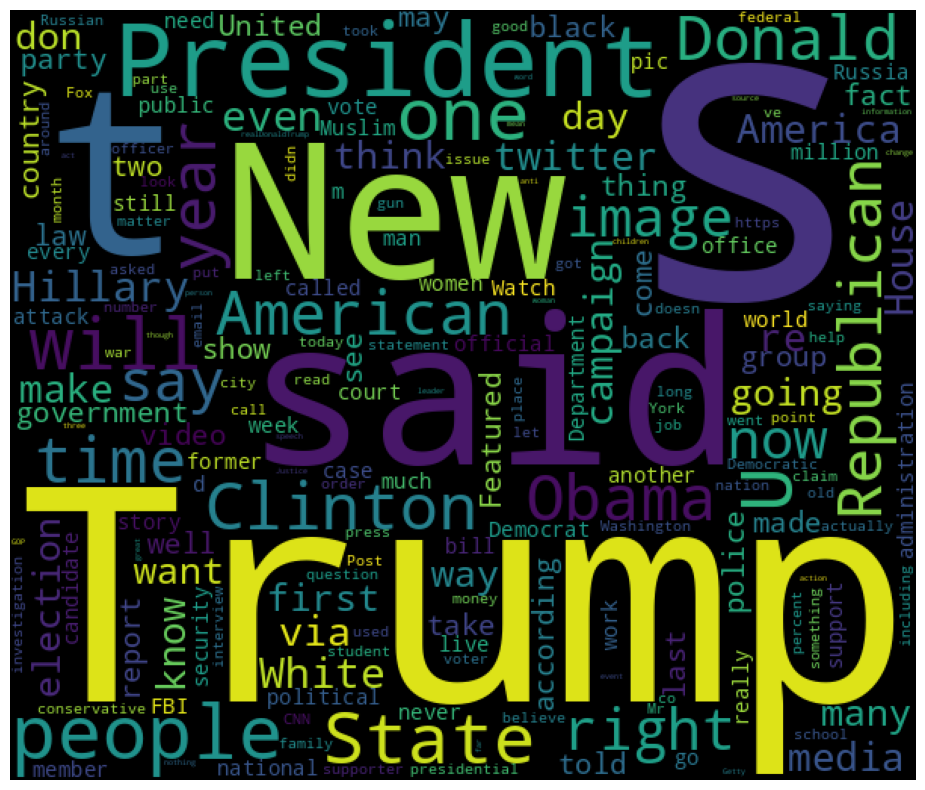

In [62]:
fake_text = " ".join(i for i in fake_data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=600,height=510,stopwords=stopwords,collocations=False).generate(fake_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [64]:
data.isnull().sum()


,0
title,0
text,0
subject,0
date,0
label,0


In [65]:
data.duplicated().sum()

np.int64(209)

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.subject.value_counts()

,count
subject,
politicsNews,11220
worldnews,9991
News,9050
politics,6838
left-news,4459
Government News,1570
US_News,783
Middle-east,778


[Text(0.5, 1.0, 'Subject frequencies ')]

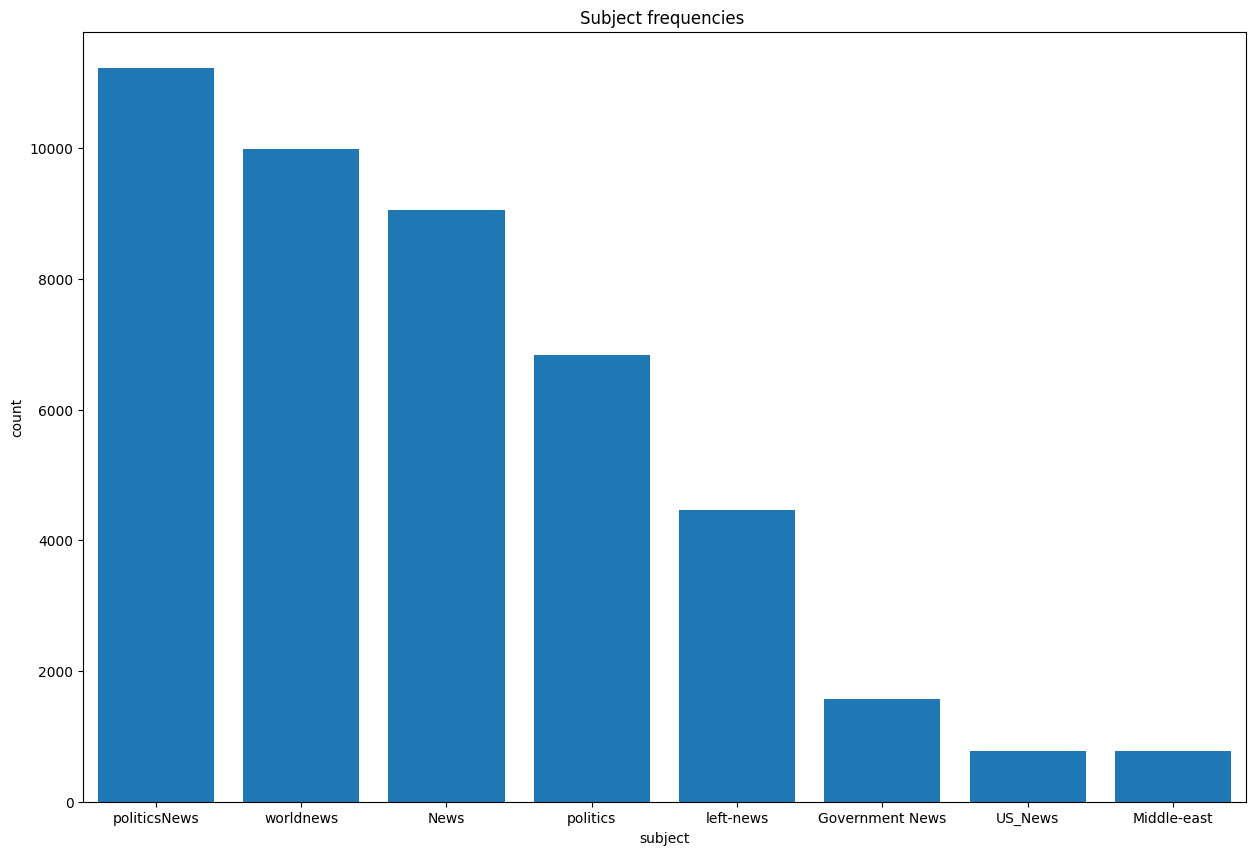

In [68]:
plt.figure(figsize=[15,10],clear=True)
sns.barplot(x=data['subject'].value_counts().index,
            y=data['subject'].value_counts(),
            saturation=1).set(title='Subject frequencies ')

In [69]:
data=data.sample(frac = 1,random_state=42).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,"Merkel, Juncker discuss Catalan crisis: EU off...",BRUSSELS (Reuters) - German Chancellor Angela ...,worldnews,"October 7, 2017",1
1,LIBERAL HACK KATIE COURIC Says Fake News Is “T...,Katie Couric is a wolf in sheep s clothing. Da...,left-news,"Jul 22, 2017",0
2,TRUMP WAS RIGHT! Audit Reveals State Dept. Cyb...,New documents appear to show a pattern of dete...,politics,"Oct 19, 2015",0
3,Clay Aiken Says He Was A ‘F*****g Dumbass’ Fo...,Former American Idol finalist and Celebrity...,News,"August 16, 2017",0
4,U.S. militia girds for trouble as presidential...,"JACKSON, Ga. (Reuters) - Down a Georgia count...",politicsNews,"November 2, 2016",1


In [70]:
data=data.drop(labels=['title','subject','date'],axis=1)
data.head()

,text,label
0,BRUSSELS (Reuters) - German Chancellor Angela ...,1
1,Katie Couric is a wolf in sheep s clothing. Da...,0
2,New documents appear to show a pattern of dete...,0
3,Former American Idol finalist and Celebrity...,0
4,"JACKSON, Ga. (Reuters) - Down a Georgia count...",1


In [71]:
# removing stopwords
data['cleaned_text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [72]:
# lemmatization by spacy

lemma = []
for text in nlp.pipe(data['cleaned_text'], batch_size=100, n_process=3):
    if text.has_annotation("DEP"):
        lemma.append([n.lemma_ for n in text])
    else:
        lemma.append(None)


In [73]:
data['lemma'] = lemma
data

,text,label,cleaned_text,lemma
0,BRUSSELS (Reuters) - German Chancellor Angela ...,1,BRUSSELS (Reuters) - German Chancellor Angela ...,"[BRUSSELS, (, Reuters, ), -, German, Chancello..."
1,Katie Couric is a wolf in sheep s clothing. Da...,0,"Katie Couric wolf sheep clothing. Dan Rather, ...","[Katie, couric, wolf, sheep, clothing, ., Dan,..."
2,New documents appear to show a pattern of dete...,0,New documents appear show pattern deterioratio...,"[new, document, appear, show, pattern, deterio..."
3,Former American Idol finalist and Celebrity...,0,Former American Idol finalist Celebrity Appren...,"[former, american, Idol, finalist, Celebrity, ..."
4,"JACKSON, Ga. (Reuters) - Down a Georgia count...",1,"JACKSON, Ga. (Reuters) - Down Georgia country ...","[JACKSON, ,, Ga., (, Reuters, ), -, Down, Geor..."
...,...,...,...,...
44684,BERLIN (Reuters) - German Finance Minister Wol...,1,BERLIN (Reuters) - German Finance Minister Wol...,"[BERLIN, (, Reuters, ), -, german, Finance, Mi..."
44685,"PUERTO ORDAZ, Venezuela (Reuters) - Venezuelan...",1,"PUERTO ORDAZ, Venezuela (Reuters) - Venezuelan...","[PUERTO, ORDAZ, ,, Venezuela, (, Reuters, ), -..."
44686,The U.S. is the great enemy of mankind! rave...,0,The U.S. great enemy mankind! raved Ernesto Ch...,"[the, U.S., great, enemy, mankind, !, rave, Er..."
44687,NEW YORK (Reuters) - U.S. money managers with ...,1,NEW YORK (Reuters) - U.S. money managers reins...,"[NEW, YORK, (, Reuters, ), -, U.S., money, man..."


In [74]:
  # Lemmatized cleaned_text re-joined (list to cleaned_text)
data['cleaned_text'] = data['lemma'].apply(' '.join)

In [75]:
# Split the data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.cleaned_text,data.label,shuffle=True)

print ("Training set shapes:", x_train.shape, y_train.shape)
print ("Test set shapes:", x_test.shape, y_test.shape)

Training set shapes: (33516,) (33516,)
Test set shapes: (11173,) (11173,)


In [76]:
# normlization data :
def normlize(data):
    normlized=[]
    for sample in data:
        sample=sample.lower() #lowercase all words
        sample=re.sub(r'(\w)\1+|(.)\1+',r'\1',sample) # remove duplicate_characters
        sample= re.sub(r'\d+','',sample) #remove numbers
        sample=re.sub(r'[^\w\s]',"",sample)#removing_punctuations
        sample=re.sub("\s\s+" , " ", sample)#removing multiple_spaces
        normlized.append(sample)
    return normlized

In [77]:
# make normlization process in training and testing data
x_train=normlize(x_train)
x_test=normlize(x_test)

In [78]:
max_vocab=10000
max_len=300 # maximum lenght of sentence
epochs = 10
embed_size = 128

In [79]:
#Tokenizer the text to vectors
tokenizer=Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)

In [80]:
# tokenize train and test data
x_train=tokenizer.texts_to_sequences(x_train)
x_test=tokenizer.texts_to_sequences(x_test)

In [81]:
# padding the text to have the same length in the article
x_train=tf.keras.preprocessing.sequence.pad_sequences(x_train,padding='post',maxlen=max_len)
x_test=tf.keras.preprocessing.sequence.pad_sequences(x_test,padding='post',maxlen=max_len)

**LSTM**

In [82]:
LSTM_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)])

LSTM_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2,restore_best_weights=False)

In [84]:
LSTM_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_LSTM=LSTM_model.fit(x_train,y_train,epochs= epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 698s 769ms/step - accuracy: 0.7684 - loss: 0.3691 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 715s 739ms/step - accuracy: 0.9902 - loss: 0.0371 - val_accuracy: 0.9933 - val_loss: 0.0261
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 667s 746ms/step - accuracy: 0.9965 - loss: 0.0140 - val_accuracy: 0.9955 - val_loss: 0.0173
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 681s 745ms/step - accuracy: 0.9988 - loss: 0.0066 - val_accuracy: 0.9934 - val_loss: 0.0290
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 680s 743ms/step - accuracy: 0.9990 - loss: 0.0057 - val_accuracy: 0.9948 - val_loss: 0.0237


In [85]:
loss_train,accuracy_train=LSTM_model.evaluate(x_train,y_train)
loss_test,accuracy_test=LSTM_model.evaluate(x_test,y_test)

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 171s 163ms/step - accuracy: 0.9995 - loss: 0.0029
350/350 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.9952 - loss: 0.0173


In [86]:
print('Results of LSTM model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)

Results of LSTM model :
In training data :Loss : 0.006377832964062691   Accuracy:  0.9985678195953369
In testing data : Loss :  0.020592395216226578   Accuracy:  0.9948089122772217


In [87]:
# plot function to visualize model
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.19070478319190443)

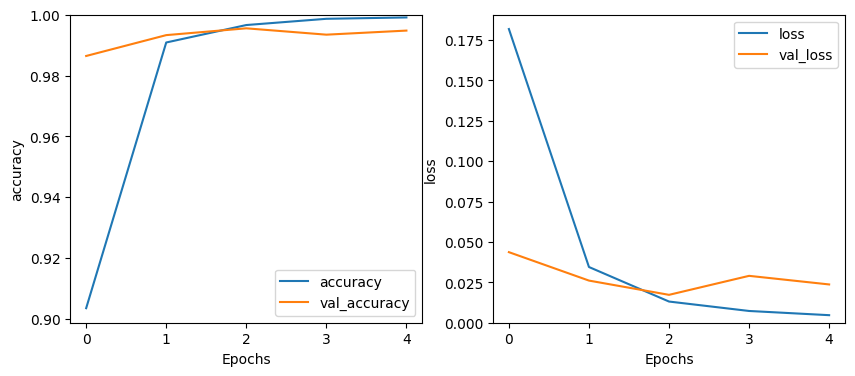

In [88]:
# plot accuracy and loss for lstm model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_LSTM, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_LSTM, 'loss')
plt.ylim(0, None)

**GRU**

In [89]:
tf.keras.backend.clear_session()

In [90]:
GRU_model=tf.keras.Sequential([
    tf.keras.layers.Embedding(max_vocab,output_dim=embed_size,input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    # tf.keras.layers.BatchNormalization(), # Layer that normalizes inputs
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)])

GRU_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
GRU_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

history_GRU=GRU_model.fit(x_train,y_train,epochs= epochs,validation_split=0.2,batch_size=30,shuffle=True,callbacks=[early_stop])

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 756s 834ms/step - accuracy: 0.7644 - loss: 0.3867 - val_accuracy: 0.9903 - val_loss: 0.0244
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 811s 844ms/step - accuracy: 0.9951 - loss: 0.0214 - val_accuracy: 0.9928 - val_loss: 0.0216
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 796s 838ms/step - accuracy: 0.9973 - loss: 0.0105 - val_accuracy: 0.9954 - val_loss: 0.0192
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 745s 833ms/step - accuracy: 0.9989 - loss: 0.0061 - val_accuracy: 0.9957 - val_loss: 0.0185
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 811s 843ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9942 - val_loss: 0.0229
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 797s 837ms/step - accuracy: 0.9994 - loss: 0.0034 - val_accuracy: 0.9949 - val_loss: 0.0242


In [92]:
# %%capture --no-display
loss_train,accuracy_train=GRU_model.evaluate(x_train,y_train)
loss_test,accuracy_test=GRU_model.evaluate(x_test,y_test)

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 170s 162ms/step - accuracy: 0.9998 - loss: 0.0021
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 167ms/step - accuracy: 0.9949 - loss: 0.0255


In [93]:
print('Results of GRU model :')
print('In training data :Loss :', loss_train ,"  Accuracy: " ,accuracy_train)
print('In testing data : Loss : ',loss_test , "  Accuracy: ",accuracy_test)

Results of GRU model :
In training data :Loss : 0.005462890490889549   Accuracy:  0.998896062374115
In testing data : Loss :  0.027137013152241707   Accuracy:  0.9944509267807007


(0.0, 0.19508017547195777)

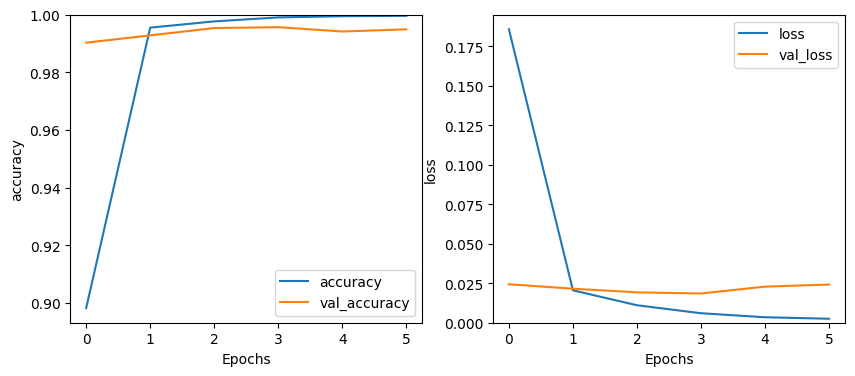

In [94]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_graphs(history_GRU, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_GRU, 'loss')
plt.ylim(0, None)